<a href="https://colab.research.google.com/github/ravi-phdm23/Articles/blob/main/Telemarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the Success of Bank Telemarketing Campaigns Using Machine Learning: A Data-Driven Approach

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.5 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neural Network AUC: 0.72
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7952
           1       0.63      0.47      0.54      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.72      0.74      9043
weighted avg       0.89      0.90      0.90      9043

Logistic Regression AUC: 0.65
Decision Tree AUC: 0.68
SVM AUC: 0.65


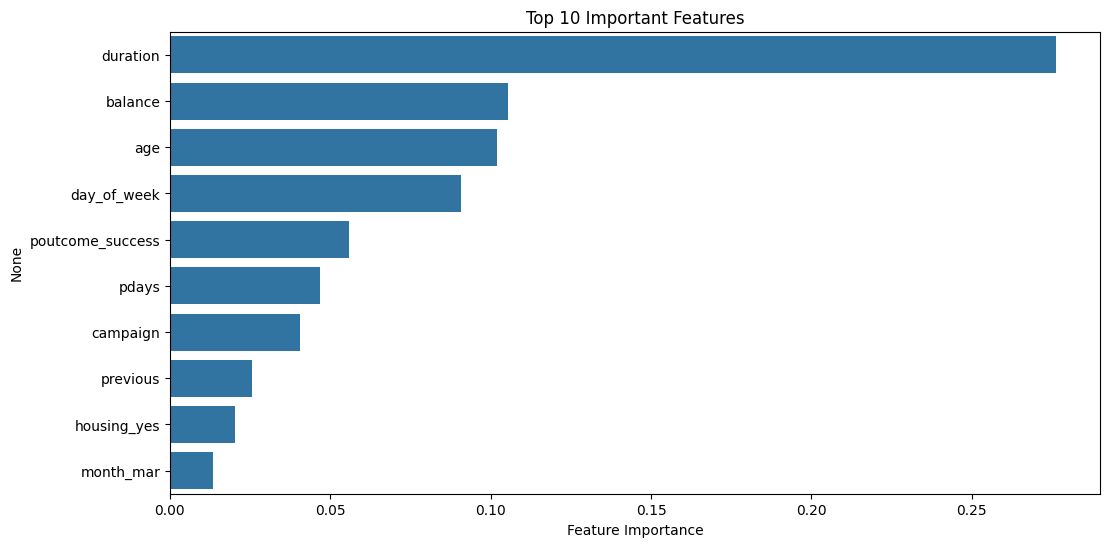

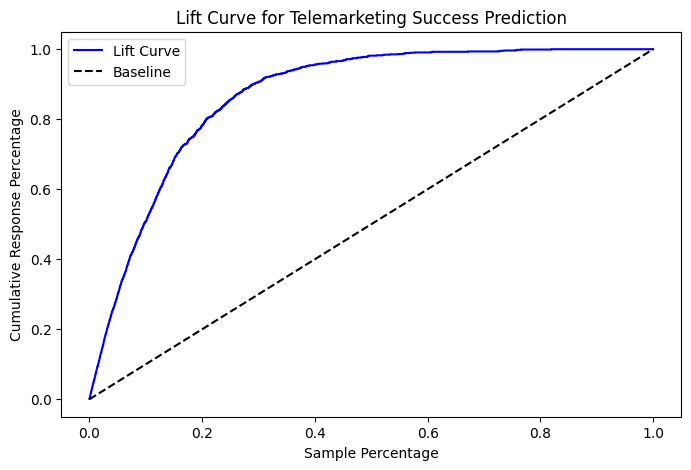

In [1]:
# Install required libraries (Run this once)
!pip install numpy pandas scikit-learn xgboost lightgbm catboost matplotlib seaborn ucimlrepo

# Import necessary libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report

# Load the dataset
bank_marketing = fetch_ucirepo(id=222)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding
le = LabelEncoder()
y = le.fit_transform(y)  # Convert target to binary (0 = no, 1 = yes)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Neural Network Model (Best Performing Model in Paper)
nn_model = MLPClassifier(hidden_layer_sizes=(12,), activation="relu", solver="adam", max_iter=500)
nn_model.fit(X_train, y_train)

# Predict and Evaluate Neural Network
y_pred_nn = nn_model.predict(X_test)
auc_nn = roc_auc_score(y_test, y_pred_nn)
print(f"Neural Network AUC: {auc_nn:.2f}")
print(classification_report(y_test, y_pred_nn))

# Train and Compare Other Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": RandomForestClassifier(),
    "SVM": SVC(probability=True)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    auc = roc_auc_score(y_test, y_pred)
    print(f"{name} AUC: {auc:.2f}")

# Feature Importance Analysis using Random Forest
rf_model = RandomForestClassifier().fit(X_train, y_train)
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)

# Plot Feature Importance
plt.figure(figsize=(12,6))
sns.barplot(x=feature_importance.sort_values(ascending=False)[:10], y=feature_importance.sort_values(ascending=False).index[:10])
plt.title("Top 10 Important Features")
plt.xlabel("Feature Importance")
plt.show()

# Lift Analysis (How Well the Model Prioritizes Likely Customers)
y_scores = nn_model.predict_proba(X_test)[:, 1]  # Get predicted probabilities
sorted_indices = np.argsort(y_scores)[::-1]  # Sort by highest probability
sorted_y_test = y_test[sorted_indices]

# Compute Lift
cumulative_responders = np.cumsum(sorted_y_test) / np.sum(y_test)
sample_percent = np.arange(1, len(y_test) + 1) / len(y_test)

# Plot Lift Curve
plt.figure(figsize=(8,5))
plt.plot(sample_percent, cumulative_responders, label="Lift Curve", color='blue')
plt.plot([0, 1], [0, 1], linestyle="--", color="black", label="Baseline")
plt.xlabel("Sample Percentage")
plt.ylabel("Cumulative Response Percentage")
plt.title("Lift Curve for Telemarketing Success Prediction")
plt.legend()
plt.show()
